## Bibliotecas

In [1]:
library('bnlearn')


Attaching package: ‘bnlearn’

The following object is masked from ‘package:stats’:

    sigma



In [2]:
#library('Rgraphviz')

## Ejemplos

### dataset learning.test (bnlearn)

#### Learning the network structure

In [3]:
# Creating custom fitted Bayesian networks
# http://www.bnlearn.com/examples/
# http://www.bnlearn.com/examples/fit/
# http://www.bnlearn.com/documentation/man/learning-test.html
str(learning.test)

'data.frame':	5000 obs. of  6 variables:
 $ A: Factor w/ 3 levels "a","b","c": 2 2 1 1 1 3 3 2 2 2 ...
 $ B: Factor w/ 3 levels "a","b","c": 3 1 1 1 1 3 3 2 2 1 ...
 $ C: Factor w/ 3 levels "a","b","c": 2 3 1 1 2 1 2 1 2 2 ...
 $ D: Factor w/ 3 levels "a","b","c": 1 1 1 1 3 3 3 2 1 1 ...
 $ E: Factor w/ 3 levels "a","b","c": 2 2 1 2 1 3 3 2 3 1 ...
 $ F: Factor w/ 2 levels "a","b": 2 2 1 2 1 1 1 2 1 1 ...


In [4]:
head(learning.test)

A,B,C,D,E,F
b,c,b,a,b,b
b,a,c,a,b,b
a,a,a,a,a,a
a,a,a,a,b,b
a,a,b,c,a,a
c,c,a,c,c,a


In [5]:
# learn structure score-based
# http://www.bnlearn.com/documentation/networks/index.html#learning
pdag <- bnlearn::iamb(learning.test)

In [6]:
# [partially directed graph]
# there is a single undirected arc in pdag; 
pdag


  Bayesian network learned via Constraint-based methods

  model:
    [partially directed graph]
  nodes:                                 6 
  arcs:                                  5 
    undirected arcs:                     1 
    directed arcs:                       4 
  average markov blanket size:           2.33 
  average neighbourhood size:            1.67 
  average branching factor:              0.67 

  learning algorithm:                    IAMB 
  conditional independence test:         Mutual Information (disc.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  140 
  optimized:                             FALSE 


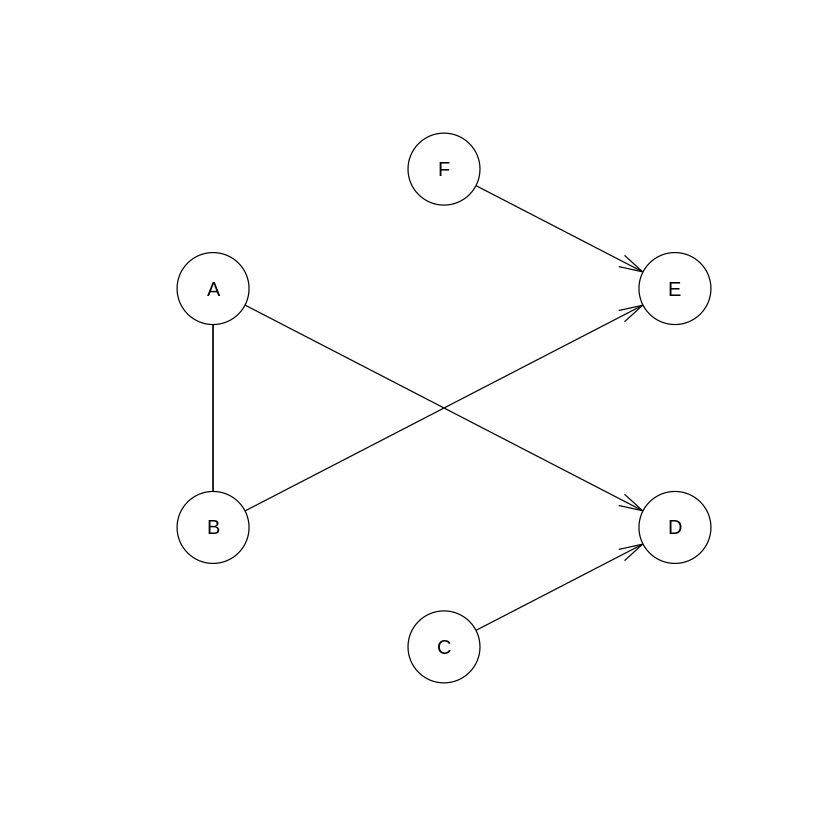

In [7]:
plot(pdag)

In [8]:
# IAMB was not able to set its orientation ...
# ... because its two possible direction are score equivalent.
bnlearn::score(set.arc(pdag, from = "A", to = "B"), learning.test)

[1] -24006.73

In [9]:
bnlearn::score(set.arc(pdag, from = "B", to = "A"), learning.test)

[1] -24006.73

In [10]:
# with the set.arc() function, if the direction of the arc is known 
# or can be guessed from the experimental setting of the data
dag = set.arc(pdag, from = "B", to = "A")

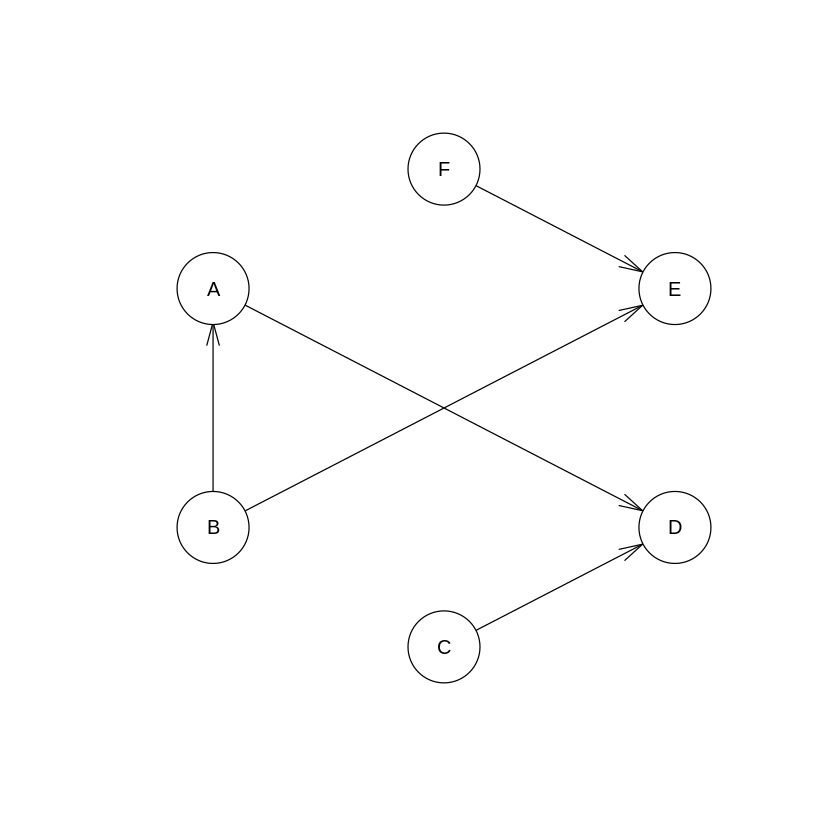

In [11]:
plot(dag)

In [12]:
# Factorización de la probabilidad conjunta del dag
modelstring(dag)

[1] "[B][C][F][A|B][E|B:F][D|A:C]"

In [13]:
# v-structs del dag (inmorales) con detalle de su extracción (debug)
bnlearn::vstructs(dag, debug = T)
# bnlearn::vstructs(dag, moral = T, debug = T)

* scanning the graph (step 1).
  > node D is the center of a v-structure.
  > node E is the center of a v-structure.
* marking v-structures (step 2).
  > fixing arc A -> D, it's part of a v-structure.
  > fixing arc C -> D, it's part of a v-structure.
  > fixing arc B -> E, it's part of a v-structure.
  > fixing arc F -> E, it's part of a v-structure.
* removing moral v-structures aka shielded colliders.
  > considering arc A -> D.
    > considering v-structure A -> D <- C.
  @ arc A -> D is part of a v-structure.
  > considering arc C -> D.
    > considering v-structure C -> D <- A.
  @ arc C -> D is part of a v-structure.
  > considering arc B -> E.
    > considering v-structure B -> E <- F.
  @ arc B -> E is part of a v-structure.
  > considering arc F -> E.
    > considering v-structure F -> E <- B.
  @ arc F -> E is part of a v-structure.


X,Z,Y
A,D,C
B,E,F


In [14]:
# clase que representa la red bayesiana (dag + cpt)(?)
class(dag)

[1] "bn"

In [15]:
# Matriz de adyacencia (otra representación del dag)
bnlearn::amat(dag)

,A,B,C,D,E,F
A,0,0,0,1,0,0
B,1,0,0,0,1,0
C,0,0,0,1,0,0
D,0,0,0,0,0,0
E,0,0,0,0,0,0
F,0,0,0,0,1,0


#### Fitting the parameters (Bayesian Posterior estimates)

In [16]:
# aprendo las cpt del dag (parámetros) con los datos
#::nota::por defecto es mle
# http://www.bnlearn.com/documentation/man/bn.fit.html
fit <- bn.fit(x = dag, data = learning.test)

In [17]:
# http://www.bnlearn.com/documentation/man/bn.fit.class.html
class(fit)

[1] "bn.fit"      "bn.fit.dnet"

In [18]:
# se puede unificar en uno la red completa (dag + cpt)
# http://www.bnlearn.com/documentation/man/bn.class.html
bn <- bn.net(x = fit)

In [19]:
class(bn)

[1] "bn"

In [20]:
bn$nodes$D

$mb
[1] "A" "C"

$nbr
[1] "A" "C"

$parents
[1] "A" "C"

$children
character(0)

In [21]:
bn$learning$algo

[1] "empty"

In [22]:
fit


  Bayesian network parameters

  Parameters of node A (multinomial distribution)

Conditional probability table:
 
   B
A            a          b          c
  a 0.60457240 0.07394366 0.09565217
  b 0.31456393 0.64964789 0.26956522
  c 0.08086367 0.27640845 0.63478261

  Parameters of node B (multinomial distribution)

Conditional probability table:
      a      b      c 
0.4724 0.1136 0.4140 

  Parameters of node C (multinomial distribution)

Conditional probability table:
      a      b      c 
0.7434 0.2048 0.0518 

  Parameters of node D (multinomial distribution)

Conditional probability table:
 
, , C = a

   A
D            a          b          c
  a 0.80081301 0.09251810 0.10530547
  b 0.09024390 0.80209171 0.11173633
  c 0.10894309 0.10539019 0.78295820

, , C = b

   A
D            a          b          c
  a 0.18079096 0.88304094 0.24695122
  b 0.13276836 0.07017544 0.49390244
  c 0.68644068 0.04678363 0.25914634

, , C = c

   A
D            a          b          c
  a 0.4

In [23]:
fit$D


  Parameters of node D (multinomial distribution)

Conditional probability table:
 
, , C = a

   A
D            a          b          c
  a 0.80081301 0.09251810 0.10530547
  b 0.09024390 0.80209171 0.11173633
  c 0.10894309 0.10539019 0.78295820

, , C = b

   A
D            a          b          c
  a 0.18079096 0.88304094 0.24695122
  b 0.13276836 0.07017544 0.49390244
  c 0.68644068 0.04678363 0.25914634

, , C = c

   A
D            a          b          c
  a 0.42857143 0.34117647 0.13333333
  b 0.20238095 0.38823529 0.44444444
  c 0.36904762 0.27058824 0.42222222


In [24]:
print(fit$D, perm = c("D", "C", "A"))


  Parameters of node D (multinomial distribution)

Conditional probability table:
 
, , A = a

   C
D            a          b          c
  a 0.80081301 0.18079096 0.42857143
  b 0.09024390 0.13276836 0.20238095
  c 0.10894309 0.68644068 0.36904762

, , A = b

   C
D            a          b          c
  a 0.09251810 0.88304094 0.34117647
  b 0.80209171 0.07017544 0.38823529
  c 0.10539019 0.04678363 0.27058824

, , A = c

   C
D            a          b          c
  a 0.10530547 0.24695122 0.13333333
  b 0.11173633 0.49390244 0.44444444
  c 0.78295820 0.25914634 0.42222222



In [25]:
fit$D$node

[1] "D"

In [26]:
fit$D$parents

[1] "A" "C"

In [27]:
fit$D$children

character(0)

In [28]:
fit$D$prob

, , C = a

   A
D            a          b          c
  a 0.80081301 0.09251810 0.10530547
  b 0.09024390 0.80209171 0.11173633
  c 0.10894309 0.10539019 0.78295820

, , C = b

   A
D            a          b          c
  a 0.18079096 0.88304094 0.24695122
  b 0.13276836 0.07017544 0.49390244
  c 0.68644068 0.04678363 0.25914634

, , C = c

   A
D            a          b          c
  a 0.42857143 0.34117647 0.13333333
  b 0.20238095 0.38823529 0.44444444
  c 0.36904762 0.27058824 0.42222222


In [29]:
bnlearn::parents(x = fit, node = 'D')

[1] "A" "C"

In [30]:
bnlearn::nbr(x = fit, node = 'D')

[1] "A" "C"

In [31]:
bnlearn::mb(x = fit, node = 'D')

[1] "A" "C"

Loading required namespace: lattice


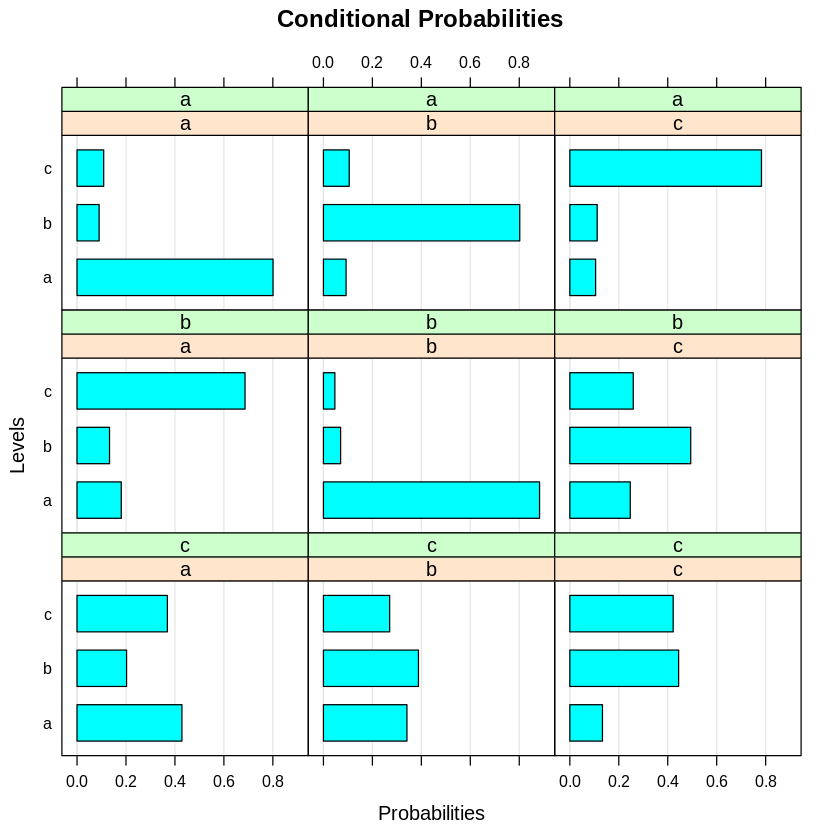

In [32]:
bn.fit.barchart(fit$D)

In [33]:
# aquí uso explícitamente bayes
fit_b = bn.fit(dag, learning.test, method = "bayes")

In [34]:
# compruebo la diferencia mle vs bayes en D
fit_b$D


  Parameters of node D (multinomial distribution)

Conditional probability table:
 
, , C = a

   A
D            a          b          c
  a 0.80077078 0.09253963 0.10532583
  b 0.09026586 0.80204982 0.11175613
  c 0.10896336 0.10541056 0.78291804

, , C = b

   A
D            a          b          c
  a 0.18083882 0.88286240 0.24698047
  b 0.13283129 0.07026091 0.49384806
  c 0.68632988 0.04687669 0.25917146

, , C = c

   A
D            a          b          c
  a 0.42844562 0.34116623 0.13357994
  b 0.20255394 0.38816362 0.44430744
  c 0.36900044 0.27067015 0.42211262


In [35]:
fit$D


  Parameters of node D (multinomial distribution)

Conditional probability table:
 
, , C = a

   A
D            a          b          c
  a 0.80081301 0.09251810 0.10530547
  b 0.09024390 0.80209171 0.11173633
  c 0.10894309 0.10539019 0.78295820

, , C = b

   A
D            a          b          c
  a 0.18079096 0.88304094 0.24695122
  b 0.13276836 0.07017544 0.49390244
  c 0.68644068 0.04678363 0.25914634

, , C = c

   A
D            a          b          c
  a 0.42857143 0.34117647 0.13333333
  b 0.20238095 0.38823529 0.44444444
  c 0.36904762 0.27058824 0.42222222


### dataset survey (clase)

#### Learning the network structure

In [36]:
# Age (A), Residence (R), Education (E), Ocupation (O), Sex (S), Transportation (T)
#::nota::echar un vistazo a la presentación de Marco Scutari (s23-32)
# http://www.bnlearn.com/about/teaching/slides-bnshort.pdf
survey <- read.table('../data/survey.txt', header = TRUE)
head(survey)

A,R,E,O,S,T
adult,big,high,emp,F,car
adult,small,uni,emp,M,car
adult,big,uni,emp,F,train
adult,big,high,emp,M,car
adult,big,high,emp,M,car
adult,small,high,emp,F,train


In [37]:
# pruebo el aprendizaje de estructura como en learning.test de bnlearn
s_dag <- bnlearn::iamb(x = survey)

In [38]:
s_dag


  Bayesian network learned via Constraint-based methods

  model:
    [undirected graph]
  nodes:                                 6 
  arcs:                                  4 
    undirected arcs:                     4 
    directed arcs:                       0 
  average markov blanket size:           1.33 
  average neighbourhood size:            1.33 
  average branching factor:              0.00 

  learning algorithm:                    IAMB 
  conditional independence test:         Mutual Information (disc.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  91 
  optimized:                             FALSE 


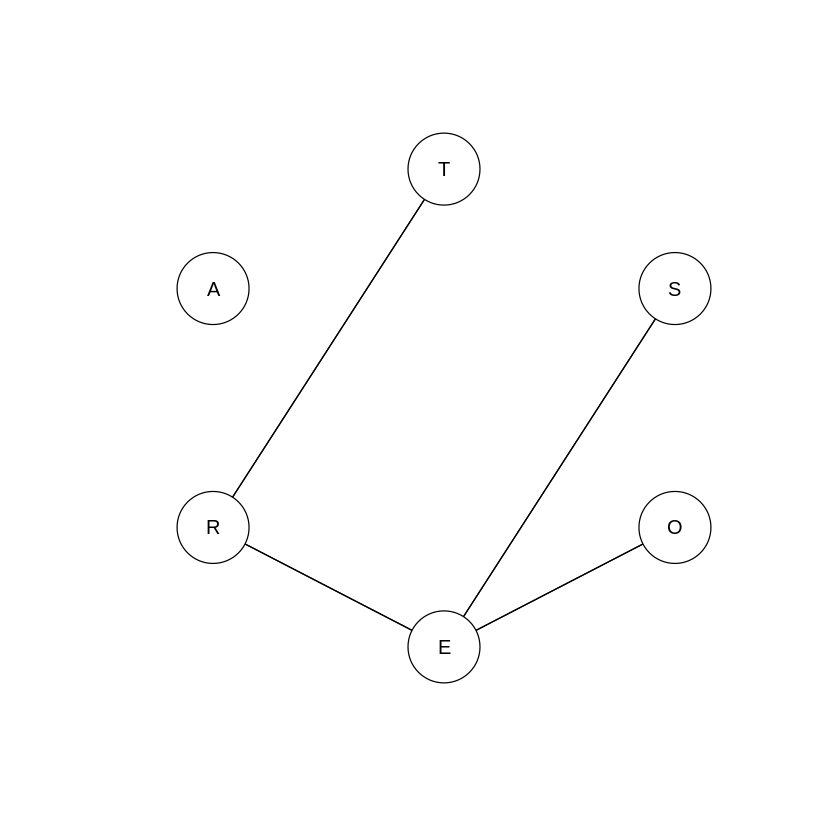

In [39]:
# Age (A), Residence (R), Education (E), Ocupation (O), Sex (S), Transportation (T)
plot(s_dag)

In [40]:
# utilizo hill climbing (con los hiperparámetros por defecto)
s_dag_hc <- hc(x = survey)

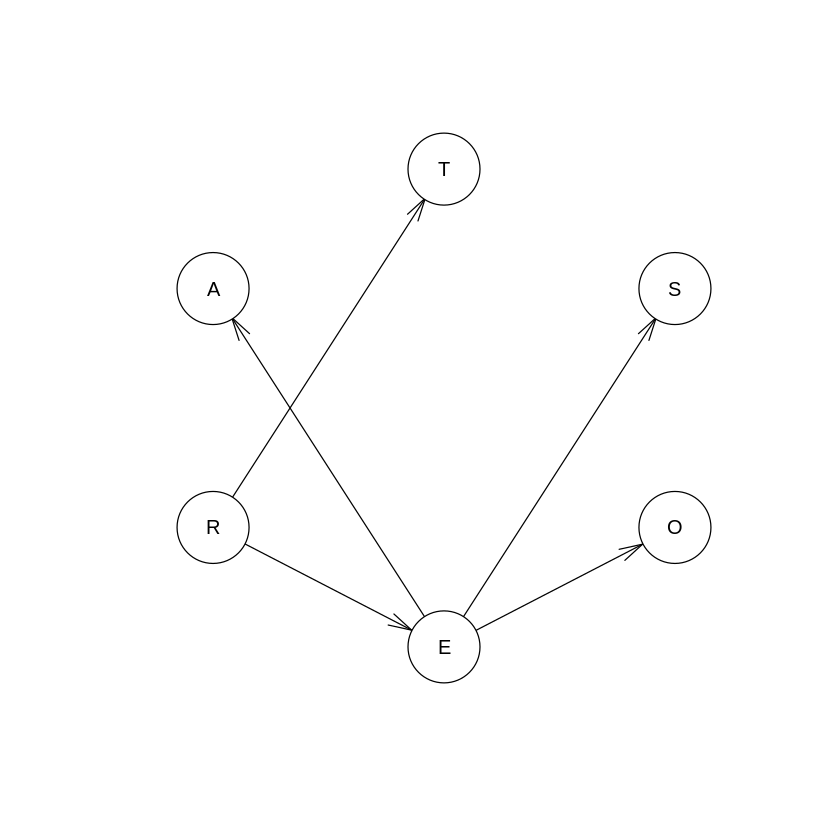

In [41]:
plot(s_dag_hc)

In [42]:
bnlearn::score(s_dag_hc, data = survey, type = "bic")

[1] -1998.432

In [43]:
# por conocimiento experto digo las dependencias que tienen que estar
# en el modelo final (whitelist) y las que NO pueden estar (blacklist)
whitelist <- matrix(c("O", "T", "E", "O", "R", "T"), 
                    ncol = 2, 
                    byrow = TRUE,
                    dimnames = list(NULL, c("from", "to"))
                   )
blacklist <- matrix(c("A", "S", "S", "A"), 
                    ncol = 2, 
                    byrow = TRUE,
                    dimnames = list(NULL, c("from", "to"))
                   )

In [44]:
s_dag_hc_r <- hc(survey, 
                 whitelist = whitelist, 
                 blacklist = blacklist)

In [45]:
bnlearn::score(s_dag_hc_r, data = survey, type = "bic")

[1] -2008.478

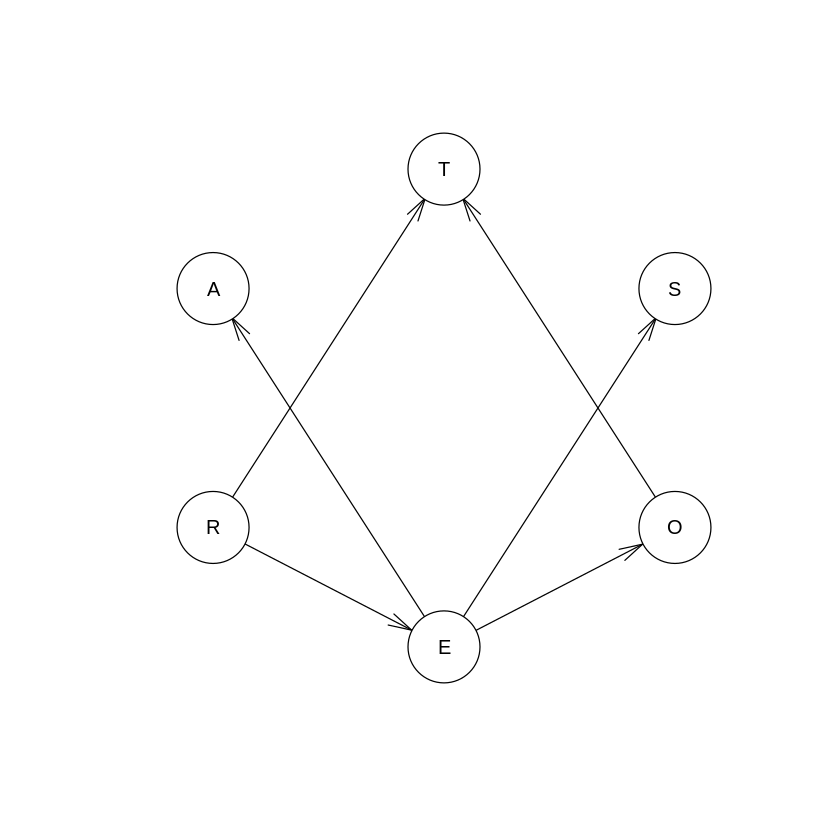

In [46]:
plot(s_dag_hc_r)

#### número de parámetros

In [47]:
str(survey)

'data.frame':	500 obs. of  6 variables:
 $ A: Factor w/ 3 levels "adult","old",..: 1 1 1 1 1 1 1 3 3 2 ...
 $ R: Factor w/ 2 levels "big","small": 1 2 1 1 1 2 1 1 1 1 ...
 $ E: Factor w/ 2 levels "high","uni": 1 2 2 1 1 1 1 2 1 2 ...
 $ O: Factor w/ 2 levels "emp","self": 1 1 1 1 1 1 1 1 1 1 ...
 $ S: Factor w/ 2 levels "F","M": 1 2 1 2 2 1 1 1 2 1 ...
 $ T: Factor w/ 3 levels "car","other",..: 1 1 3 1 1 3 1 3 1 1 ...


In [48]:
modelstring(s_dag_hc)

[1] "[R][E|R][T|R][A|E][O|E][S|E]"

In [49]:
# se puede calcular el número de parámetros con el dag y el dataset
nparams(x = s_dag_hc, data = survey, effective = FALSE, debug = TRUE)

* node A has 4 parameter(s).
* node R has 1 parameter(s).
* node E has 2 parameter(s).
* node O has 2 parameter(s).
* node S has 2 parameter(s).
* node T has 4 parameter(s).


[1] 15

In [50]:
nparams(x = s_dag_hc, data = survey, effective = TRUE, debug = TRUE)

* node A has 4 parameter(s).
* node R has 1 parameter(s).
* node E has 2 parameter(s).
* node O has 2 parameter(s).
* node S has 2 parameter(s).
* node T has 4 parameter(s).


[1] 15

In [51]:
modelstring(s_dag_hc_r)

[1] "[R][E|R][A|E][O|E][S|E][T|R:O]"

In [52]:
nparams(x = s_dag_hc_r, data = survey, effective = FALSE, debug = TRUE)

* node A has 4 parameter(s).
* node R has 1 parameter(s).
* node E has 2 parameter(s).
* node O has 2 parameter(s).
* node S has 2 parameter(s).
* node T has 8 parameter(s).


[1] 19

In [53]:
# http://www.bnlearn.com/documentation/man/mb.html
# effective a boolean value. 
# If TRUE the number of non-zero free parameters is returned, that is, 
# the effective degrees of freedom of the network; otherwise the theoretical 
# number of parameters is returned.
nparams(x = s_dag_hc_r, data = survey, effective = TRUE, debug = TRUE)

* node A has 4 parameter(s).
* node R has 1 parameter(s).
* node E has 2 parameter(s).
* node O has 2 parameter(s).
* node S has 2 parameter(s).
* node T has 7 parameter(s).


[1] 18

#### Learning parameters

In [54]:
# aquí uso explícitamente bayes
s_param_b = bn.fit(x = s_dag_hc_r, 
                   data = survey, 
                   method = "bayes", debug = TRUE)

* fitting parameters of node A (discrete).
  > found parents: E 
  > fitted 6 conditional probabilities.
* fitting parameters of node R (discrete).
  > fitted 2 marginal probabilities.
* fitting parameters of node E (discrete).
  > found parents: R 
  > fitted 4 conditional probabilities.
* fitting parameters of node O (discrete).
  > found parents: E 
  > fitted 4 conditional probabilities.
* fitting parameters of node S (discrete).
  > found parents: E 
  > fitted 4 conditional probabilities.
* fitting parameters of node T (discrete).
  > found parents: R O 
  > fitted 12 conditional probabilities.


In [55]:
s_param_b$R


  Parameters of node R (multinomial distribution)

Conditional probability table:
      big    small 
0.757485 0.242515 

In [56]:
s_param_b$T


  Parameters of node T (multinomial distribution)

Conditional probability table:
 
, , O = emp

       R
T              big      small
  car   0.58452787 0.54655295
  other 0.19954494 0.07746979
  train 0.21592719 0.37597726

, , O = self

       R
T              big      small
  car   0.68553459 0.72549020
  other 0.15723270 0.25490196
  train 0.15723270 0.01960784


In [ ]:
# S63 en S01_BayesianNetwoks
# S and R d­separated?
dsep(dag, x = "S", y = "R")

In [ ]:
# Is there a path between S and R?
path(dag, from = "S", to = "R")

## Clase

### S01_Bayesian_Networks

![ejemplo lluvia santander](m1970-ejemplo-meteo-santander.png)

In [3]:
## (S23) States of the variables:
estados.Wind <- c("NE","SE","SW","NW")
estados.Season <- c("Anual","Invierno","Primavera","Verano","Otono")
estados.Precip <- c("Seco","Lluvioso")

In [4]:
## Table of Absolute frequencies:
table.freq <- array(c(1014, 64, 225, 288, 190, 24, 98, 49, 287, 6, 18, 95, 360, 1, 15, 108, 177, 33, 94, 36, 516, 57, 661, 825, 99, 18, 223, 150, 166, 4, 119, 277, 162, 9, 71, 251, 89, 26, 248, 147), 
                    dim = c(4,5,2),
                    dimnames = list(W=estados.Wind, S=estados.Season, P = estados.Precip))

In [5]:
dim(table.freq)

[1] 4 5 2

In [8]:
print(table.freq)

, , P = Seco

    S
W    Anual Invierno Primavera Verano Otono
  NE  1014      190       287    360   177
  SE    64       24         6      1    33
  SW   225       98        18     15    94
  NW   288       49        95    108    36

, , P = Lluvioso

    S
W    Anual Invierno Primavera Verano Otono
  NE   516       99       166    162    89
  SE    57       18         4      9    26
  SW   661      223       119     71   248
  NW   825      150       277    251   147



In [6]:
## Obtain the probability:
#P(Invierno, Lluuioso, NW) = freq (Invierno, Lluvioso, NW)/N
table.freq["NW","Invierno","Lluvioso"]/sum(table.freq[,"Anual",])

[1] 0.04109589

In [7]:
## Obtain the probability:
# P(Invierno) = freq(Invierno)/N
sum(table.freq[,"Invierno",])/sum(table.freq[,"Anual",])

[1] 0.2331507

In [9]:
#::nota:: freq(Invierno) = suma de la suma de las columnas Lluvioso (490) y Seco (391)
#         para todos los vientos
#::nota::esto es "marginalizar"
sum(table.freq[,"Invierno",])

[1] 851

In [10]:
## P(Invierno|NW) = freq (Invierno, NW)/freq(NW) 
#                 = freq (Seco, Lluvioso|Invierno, NW)/freq (Seco, Lluvioso|Anual, NW)
#                 = 199/1113
## P(Y|X) = P(Y,X)/P(X) = P(X|Y)P(Y)/P(X)
## New probability-space:
cond.table.freq <- table.freq["NW",,]
print(cond.table.freq)

           P
S           Seco Lluvioso
  Anual      288      825
  Invierno    49      150
  Primavera   95      277
  Verano     108      251
  Otono       36      147


In [11]:
## Obtain the probability:
sum(cond.table.freq["Invierno",])/sum(cond.table.freq["Anual",])

[1] 0.178796

(S33-S40) Viene con un ejemplo gráfico de adenocarcinoma pero sin código

**PTE**: ¿Puedo ponerlo con código?

No aparece en los [ejemplos de bnlearn](http://www.bnlearn.com/bnrepository/).

![ejemplo adenocarcinoma gástrico](m1970-ejemplo-adenocarcinoma-gastrico.png)

## Otros

Replicar el Notebook de un ejemplo con Cancer:

  - [Bayesian Networks](http://www.di.fc.ul.pt/~jpn/r/bayesnets/bayesnets.html) de [João Neto](http://www.di.fc.ul.pt/~jpn/) December 2013
  
**::NOTA::** Tiene [tutoriales](http://www.di.fc.ul.pt/~jpn/r/index.htm) y [Github](https://github.com/jpneto/Markdowns).


Intentar hacer el *Student Example* en (s7-)

 - Readings: K&F 3.1, 3.2, 3.3, 3.4.1 Bayesian Network Representation [Lecture 2](https://courses.cs.washington.edu/courses/cse515/11sp/class2-bayesnet-annot.pdf) – Mar 30, 2011CSE 515, Statistical Methods, Spring 2011Instructor: Su-In LeeUniversity of Washington, Seattle

The Naive Bayesian Classifier is included in the R-package e1071 (see
function naiveBayes).
An example with the Breast Cancer data set could be found here:

https://sw23993.wordpress.com/2017/02/17/naive-bayes-classification-in-r-part-
2/

The data set could be download from the UCI repository:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

**::NOTA::** Ejercicio propuesto

## Tarea entregable

In [55]:
suppressMessages(library('bnlearn'))

Pide la cadena de factorización que define al *grafo experto* pero sin construir el grafo previamente, deduciendolo del dibujo del grafo.

![grafo experto meteoro aeropuerto santander](../../deliverable/tarea-04/dag-meteo-modelo-experto.png)

Yo primero creo el grafo para obtener la cadena ... :)

In [56]:
nodos <- c("lluvia", "nieve", "granizo", "tormenta", "niebla", 
           "rocio", "escarcha", "nieveSuelo", "neblina", "viento")

In [57]:
meteoro_dag <- empty.graph(nodes = nodos)

In [58]:
arcos <- matrix(c("viento", "lluvia",
                  "lluvia", "tormenta",
                  "tormenta", "nieve",
                  "nieve", "nieveSuelo",
                  "tormenta", "granizo",
                  "viento", "niebla",
                  "viento", "rocio",
                  "rocio", "niebla",
                  "rocio", "escarcha",
                  "niebla", "neblina"),
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to"))
                 )

In [59]:
arcs(x = meteoro_dag) <- arcos

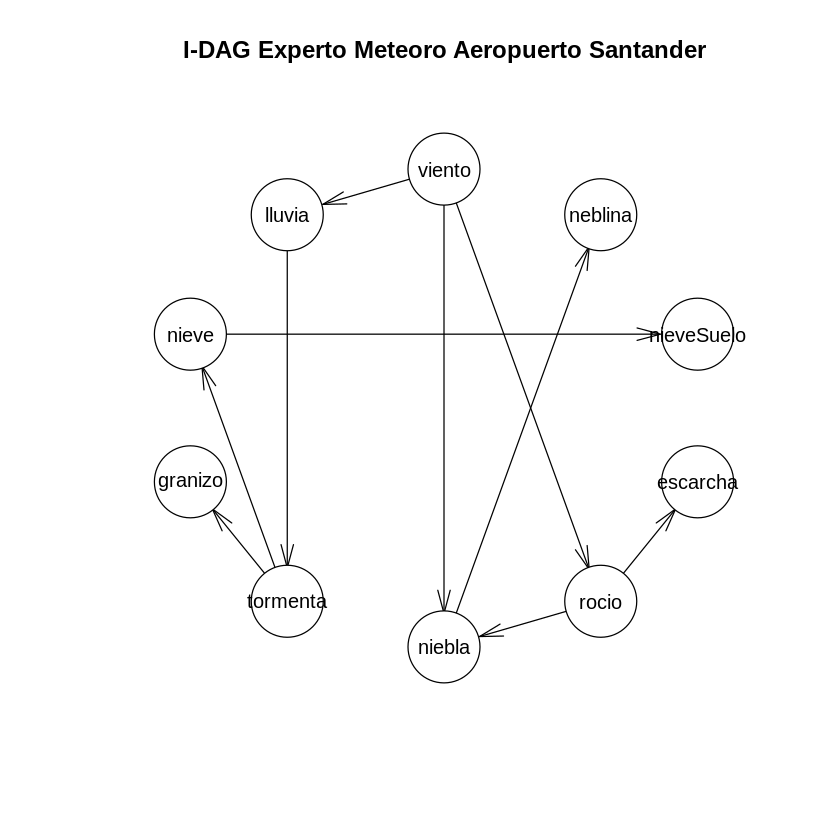

In [60]:
plot(meteoro_dag, main = 'I-DAG Experto Meteoro Aeropuerto Santander')

In [61]:
# divergente
dsep(bn = meteoro_dag, x = 'lluvia', y = 'rocio', z = 'viento')

[1] TRUE

In [62]:
dsep(bn = meteoro_dag, x = 'lluvia', y = 'rocio')

[1] FALSE

In [63]:
# cadena
dsep(bn = meteoro_dag, x = 'viento', y = 'tormenta', z = 'lluvia')

[1] TRUE

In [64]:
dsep(bn = meteoro_dag, x = 'viento', y = 'tormenta')

[1] FALSE

In [65]:
# divergente
dsep(bn = meteoro_dag, x = 'granizo', y = 'nieve', z = 'tormenta')

[1] TRUE

In [66]:
dsep(bn = meteoro_dag, x = 'granizo', y = 'nieve')

[1] FALSE

In [67]:
# cadena
dsep(bn = meteoro_dag, x = 'tormenta', y = 'nieveSuelo', z = 'nieve')

[1] TRUE

In [68]:
dsep(bn = meteoro_dag, x = 'tormenta', y = 'nieveSuelo')

[1] FALSE

In [69]:
# v-structure moral
dsep(bn = meteoro_dag, x = 'viento', y = 'rocio', z = 'niebla')

[1] FALSE

In [70]:
dsep(bn = meteoro_dag, x = 'viento', y = 'rocio')

[1] FALSE

In [71]:
dsep(bn = meteoro_dag, x = 'viento', y = 'neblina')

[1] FALSE

In [72]:
dsep(bn = meteoro_dag, x = 'viento', y = 'neblina', z = c('rocio', 'niebla'))

[1] TRUE

In [73]:
dsep(bn = meteoro_dag, x = 'viento', y = 'escarcha')

[1] FALSE

In [74]:
dsep(bn = meteoro_dag, x = 'viento', y = 'escarcha', z = 'rocio')

[1] TRUE

In [75]:
modelstring(x = meteoro_dag)

[1] "[viento][lluvia|viento][rocio|viento][tormenta|lluvia][niebla|rocio:viento][escarcha|rocio][nieve|tormenta][granizo|tormenta][neblina|niebla][nieveSuelo|nieve]"

In [76]:
class(meteoro_dag)

[1] "bn"

In [78]:
meteoro_dag$nodes$tormenta$parents

[1] "lluvia"

In [79]:
nodes(meteoro_dag)

[1] "lluvia"     "nieve"      "granizo"    "tormenta"   "niebla"    
 [6] "rocio"      "escarcha"   "nieveSuelo" "neblina"    "viento"

In [80]:
class(nodes(meteoro_dag))

[1] "character"

In [81]:
length(nodes(meteoro_dag))

[1] 10

In [82]:
for (n in bnlearn::nodes(meteoro_dag)) {
  cat("Node: ", n,
      "-> Parent: ",
      bnlearn::parents(x = meteoro_dag, node = n),
      '\n'
     ) 
}

Node:  lluvia -> Parent:  viento 
Node:  nieve -> Parent:  tormenta 
Node:  granizo -> Parent:  tormenta 
Node:  tormenta -> Parent:  lluvia 
Node:  niebla -> Parent:  rocio viento 
Node:  rocio -> Parent:  viento 
Node:  escarcha -> Parent:  rocio 
Node:  nieveSuelo -> Parent:  nieve 
Node:  neblina -> Parent:  niebla 
Node:  viento -> Parent:   


In [83]:
for (n in bnlearn::nodes(meteoro_dag)) {
  cat("Node: ", n,
      "-> Children: ",
      children(x = meteoro_dag, node = n),
      '\n'
     ) 
}

Node:  lluvia -> Children:  tormenta 
Node:  nieve -> Children:  nieveSuelo 
Node:  granizo -> Children:   
Node:  tormenta -> Children:  nieve granizo 
Node:  niebla -> Children:  neblina 
Node:  rocio -> Children:  niebla escarcha 
Node:  escarcha -> Children:   
Node:  nieveSuelo -> Children:   
Node:  neblina -> Children:   
Node:  viento -> Children:  lluvia niebla rocio 


In [84]:
bnlearn::nbr(x = meteoro_dag, node = 'lluvia')

[1] "tormenta" "viento"

In [85]:
class(children(x = meteoro_dag, node = 'granizo'))

[1] "character"

In [86]:
identical(children(x = meteoro_dag, node = 'granizo'), character(0))

[1] TRUE

In [87]:
identical(children(x = meteoro_dag, node = 'lluvia'), character(0))

[1] FALSE

In [88]:
root.nodes(x = meteoro_dag)

[1] "viento"

In [89]:
leaf.nodes(x = meteoro_dag)

[1] "granizo"    "escarcha"   "nieveSuelo" "neblina"

In [90]:
ancestors(x = meteoro_dag, node = 'granizo')

[1] "tormenta" "lluvia"   "viento"

In [91]:
descendants(x = meteoro_dag, node = 'viento')

[1] "lluvia"     "rocio"      "tormenta"   "niebla"     "escarcha"  
[6] "nieve"      "granizo"    "neblina"    "nieveSuelo"

## dsep

In [92]:
bn = model2network("[A][C|A][B|C]")

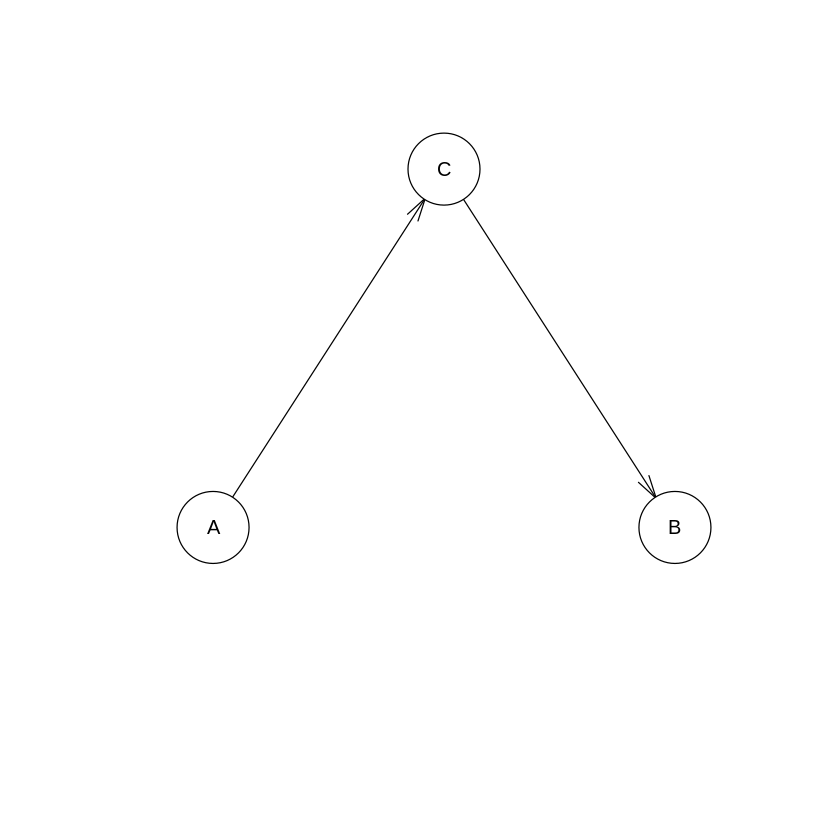

In [93]:
plot(bn)

In [94]:
dsep(bn, "A", "B")

[1] FALSE

In [95]:
dsep(bn, "A", "B", "C")

[1] TRUE

In [96]:
bn_2 = model2network("[A][C][B|A:C]")

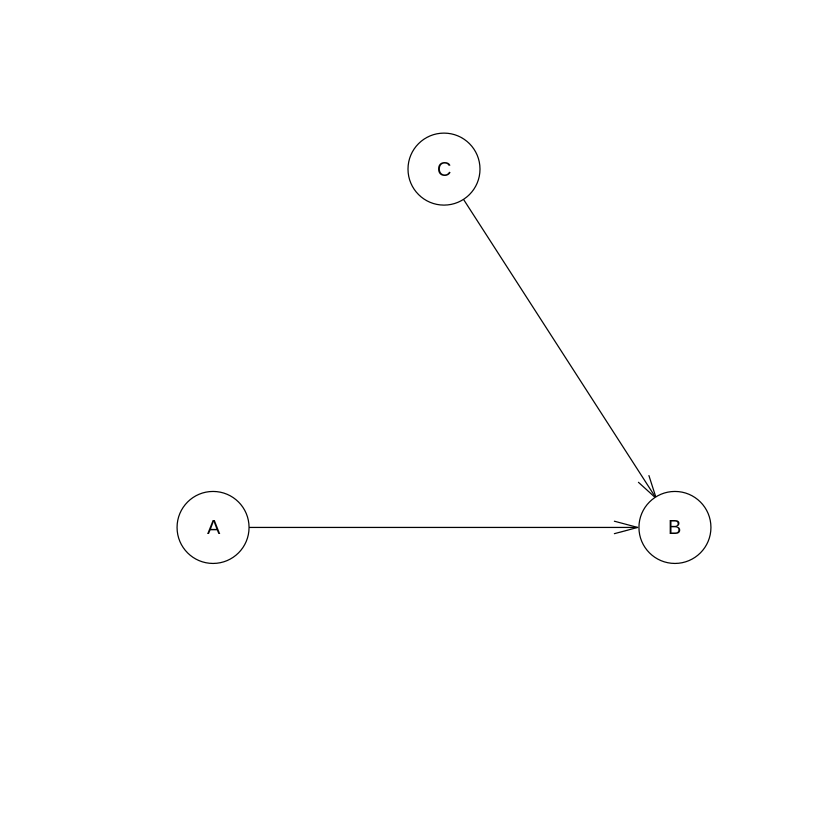

In [97]:
plot(bn_2)

In [98]:
dsep(bn_2, "A", "C")

[1] TRUE

In [99]:
dsep(bn_2, "A", "C", "B")

[1] FALSE

In [100]:
# Ejemplo S02_Bayesian_Networks (S13-S14)
dag2 <- empty.graph(nodes=c("E","V","W","H","C","P"))
dag2 <- set.arc(dag2,from="E",to="W")
dag2 <- set.arc(dag2,from="V",to="W")
dag2 <- set.arc(dag2,from="W",to="C")
dag2 <- set.arc(dag2,from="W",to="P")
dag2 <- set.arc(dag2,from="H",to="P")

![Ejemplo Clase dsep](01-ejemplo-clase-s02.png)

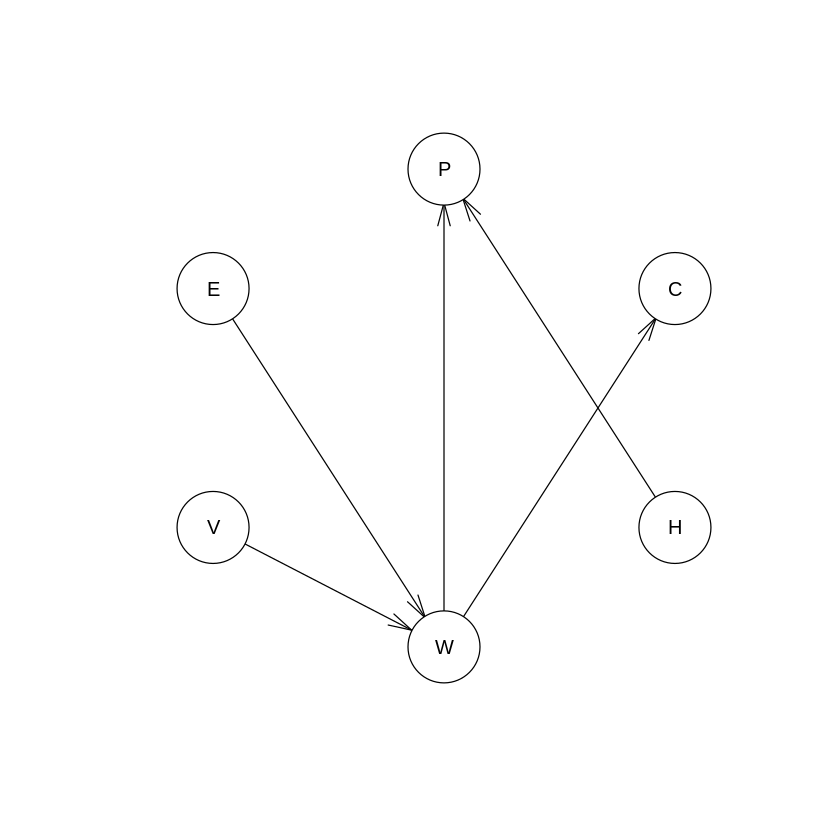

In [101]:
plot(dag2)

![Independece test E, V](02-ejemplo-clase-s02.png)

In [102]:
# I(E,V,0)
dsep(bn = dag2, x = 'E', y = 'V')

[1] TRUE

In [103]:
#::nota::se habla de ver tb si hay un camino(path)
# http://www.bnlearn.com/documentation/man/graph.html
# check whether there is a path between two nodes.
#path(x, from, to, direct = TRUE, underlying.graph = FALSE, debug = FALSE)
path(x = dag2, from = 'E', to = 'V', debug = TRUE)

* currently at 'E'.
  > current path is:
'E' 
  > jumping to 'W'.
* currently at 'W'.
  > current path is:
'E' 'W' 
  > jumping to 'C'.
* currently at 'C'.
  > current path is:
'E' 'W' 'C' 
  > node 'C' has no more children, going back to 'W'.
  > jumping to 'P'.
* currently at 'P'.
  > current path is:
'E' 'W' 'P' 
  > node 'P' has no more children, going back to 'W'.
  > node 'W' has no more children, going back to 'E'.


[1] FALSE

![Dependece E,H dado P](03-ejemplo-clase-s02.png)

In [104]:
# D(E,H,P)
dsep(bn = dag2, x = 'E', y = 'H', z = 'P')

[1] FALSE

In [105]:
path(x = dag2, from = 'E', to = 'H', debug = TRUE)

* currently at 'E'.
  > current path is:
'E' 
  > jumping to 'W'.
* currently at 'W'.
  > current path is:
'E' 'W' 
  > jumping to 'C'.
* currently at 'C'.
  > current path is:
'E' 'W' 'C' 
  > node 'C' has no more children, going back to 'W'.
  > jumping to 'P'.
* currently at 'P'.
  > current path is:
'E' 'W' 'P' 
  > node 'P' has no more children, going back to 'W'.
  > node 'W' has no more children, going back to 'E'.


[1] FALSE

In [106]:
path(x = dag2, from = 'E', to = 'H', underlying.graph = TRUE, debug = TRUE)

* currently at 'E'.
  > current path is:
'E' 
  > jumping to 'W'.
* currently at 'W'.
  > current path is:
'E' 'W' 
  @ node 'E' already visited, skipping.
  > jumping to 'V'.
* currently at 'V'.
  > current path is:
'E' 'W' 'V' 
  @ node 'W' already visited, skipping.
  > node 'V' has no more children, going back to 'W'.
  > jumping to 'C'.
* currently at 'C'.
  > current path is:
'E' 'W' 'C' 
  @ node 'W' already visited, skipping.
  > node 'C' has no more children, going back to 'W'.
  > jumping to 'P'.
* currently at 'P'.
  > current path is:
'E' 'W' 'P' 
  @ node 'W' already visited, skipping.
  > jumping to 'H'.


[1] TRUE

![Independence C,P dado E,W](04-ejemplo-clase-s02.png)

In [107]:
# I(C,P|{E,W})
dsep(bn = dag2, x = 'C', y = 'P',z = c('E', 'W'))

[1] TRUE

In [108]:
path(x = dag2, from = 'C', to = 'P', direct = TRUE)

[1] FALSE

In [109]:
path(x = dag2, from = 'C', to = 'P', underlying.graph = TRUE)

[1] TRUE

![Dependence C, {H,P} dado E](05-ejemplo-clase-s02.png)

In [110]:
# D(C, {H,P}|E)
#::nota:da error pq soalamente se puede calcular dsep entre DOS nodos individuales
# http://www.bnlearn.com/documentation/man/dsep.html
dsep(bn = dag2, x = 'C', y = c('H', 'P'), z = 'E')

ERROR: Error in check.nodes(y, graph = bn, max.nodes = 1): at most 1 node(s) needed.
